### CNN with CIFAR10

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

X_train = X_train.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step
(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


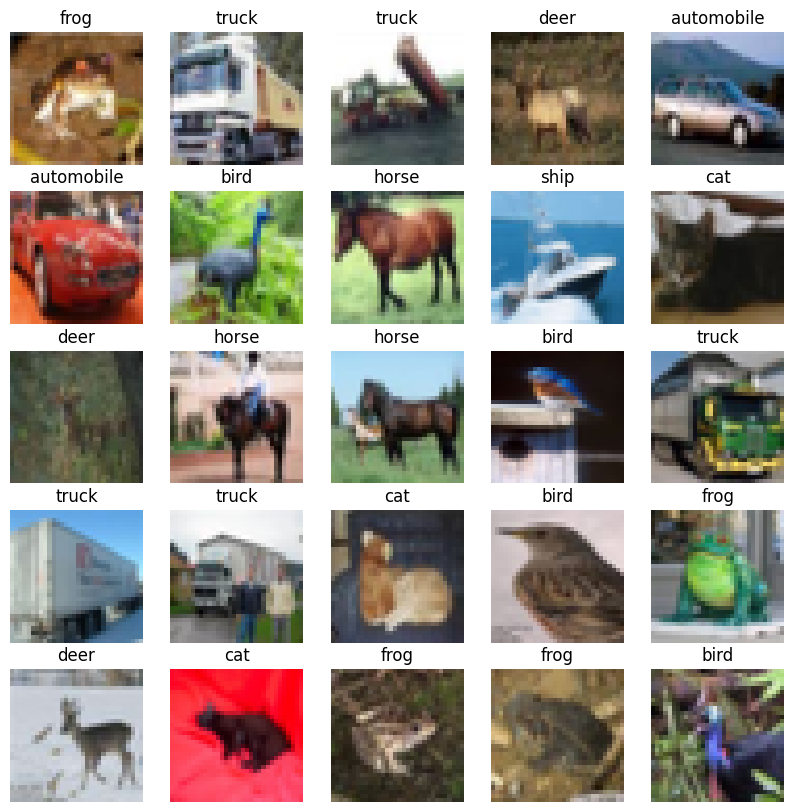

In [3]:
import matplotlib.pyplot as plt

# 클래스 레이블 매핑
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# 샘플 데이터 출력
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

In [4]:
c_model = Sequential()

c_model.add(Conv2D(input_shape=(32,32,3), kernel_size=(3,3),
                   filters=32, activation='relu'))
c_model.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu'))
c_model.add(MaxPool2D(pool_size=(2,2)))
c_model.add(Dropout(0.25))

c_model.add(Flatten())

c_model.add(Dense(128, activation='relu'))
c_model.add(Dropout(0.5))
c_model.add(Dense(10, activation='softmax'))

c_model.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

c_model.summary()

c:\Users\main\miniconda3\envs\dl\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,626,442 (6.20 MB)

 Trainable params: 1,626,442 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# early stopping
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [6]:
c_history = c_model.fit(X_train, y_train, batch_size=128,
                        epochs=30, validation_data=(X_test, y_test),
                        callbacks=[early_stop])

Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.3158 - loss: 1.8736 - val_accuracy: 0.5600 - val_loss: 1.2611
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.5202 - loss: 1.3433 - val_accuracy: 0.6224 - val_loss: 1.1081
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.5799 - loss: 1.1862 - val_accuracy: 0.6430 - val_loss: 1.0305
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.6145 - loss: 1.0857 - val_accuracy: 0.6585 - val_loss: 0.9703
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.6291 - loss: 1.0444 - val_accuracy: 0.6780 - val_loss: 0.9333
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.6484 - loss: 0.9857 - val_accuracy: 0.6878 - val_loss: 0.9106
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.6686 - loss: 0.9322 - val_accuracy: 0.6923 - val_loss: 0.8855
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.6853 - loss: 0.8826 - 

In [7]:
c_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7119 - loss: 0.8388


[0.8508855700492859, 0.7069000005722046]

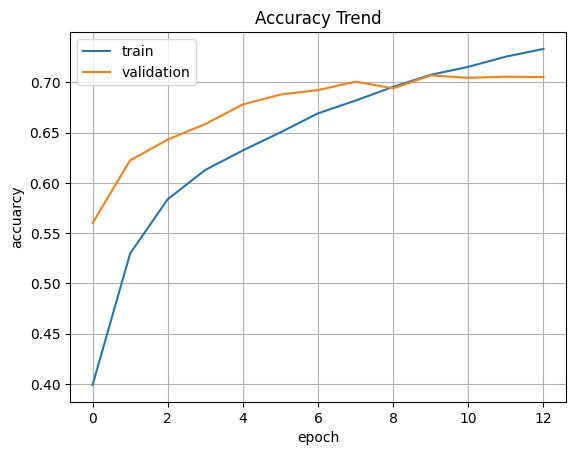

In [8]:
plt.plot(c_history.history['accuracy'])
plt.plot(c_history.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuarcy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.grid()
plt.show()

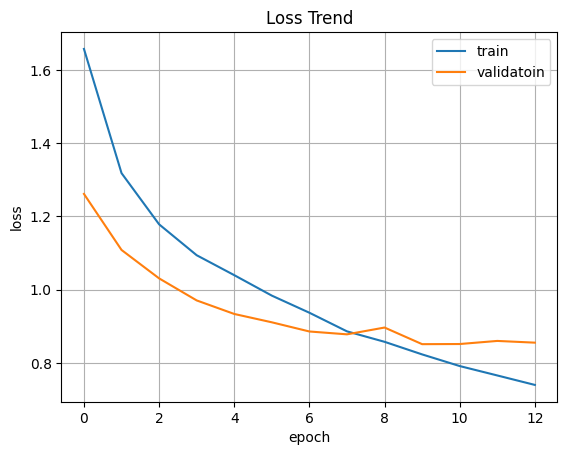

In [9]:
plt.plot(c_history.history['loss'])
plt.plot(c_history.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validatoin'], loc='best')
plt.grid()
plt.show()

### CNN 성능개선

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [12]:
ImgGen = ImageDataGenerator(rotation_range=20, shear_range=0.2, width_shift_range=0.2,
                            height_shift_range=0.2, horizontal_flip=True)

print(f'X_train.shape[0] = {X_train.shape[0]}')

argument_size = X_train.shape[0]

if argument_size >= X_train.shape[0]:
    argument_size = X_train.shape[0]-1
    # 데이터 증강 사이즈가 훈련 데이터의 개수와 같거나 크다면, 중복된 이미지가 생성될 수 있다.
    
print(f'argument_size = {argument_size}')

randi = np.random.choice(X_train.shape[0], size=argument_size, replace=False)
# X_train.shape[0]에서 argument_size 개수만큼의 랜덤한 인덱스를 생성.

X_train.shape[0] = 50000
argument_size = 49999


In [13]:
X_argumented = X_train[randi].copy()
y_argumented = y_train[randi].copy()
# randi 배열에 있는 인덱스를 사용하여 훈련 데이터셋에서 증강할 이미지를 임의로 선택

gen = ImgGen.flow(X_argumented, y_argumented, batch_size=argument_size, shuffle=False)
# 선택한 이미지에 대한 데이터 증강을 수행하는 생성기를 생성

X_argumented, y_argumented = next(gen)
# next() 함수로 다음 배치의 데이터를 가져온다. x_arg와 y_arg에는 증강된 이미지와 해당 레..

X_train = np.concatenate((X_train, X_argumented))
y_train = np.concatenate((y_train, y_argumented))
# 원래의 훈련 데이터셋인 y_train에 증강된 데이터인 y_arg를 연결하여 데이터셋을 확장

Sort = np.arange(X_train.shape[0]) # X_train의 크기를 기준으로 순서 범위를 생성.
np.random.shuffle(Sort) # 데이터를 임의로 섞기 위해 사용

X_train = X_train[Sort]
y_train = y_train[Sort]

In [14]:
c_model = Sequential()

c_model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
c_model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
c_model.add(MaxPool2D(pool_size=(2,2)))
c_model.add(Dropout(0.25))

c_model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
c_model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
c_model.add(MaxPool2D(pool_size=(2,2)))
c_model.add(Dropout(0.25))

c_model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
c_model.add(MaxPool2D(pool_size=(2,2)))
c_model.add(Dropout(0.25))

c_model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
c_model.add(MaxPool2D(pool_size=(2,2)))
c_model.add(Dropout(0.25))

c_model.add(Flatten())

c_model.add(Dense(128, activation='relu'))
c_model.add(Dropout(0.5))
c_model.add(Dense(10, activation='softmax'))

c_model.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

c_model.summary()

c:\Users\main\miniconda3\envs\dl\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,082 (2.16 MB)

 Trainable params: 567,082 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
c_history = c_model.fit(X_train, y_train, batch_size=256,
                        epochs=250, validation_data=(X_test, y_test),
                        # callbacks=[early_stop]
                        )

Epoch 1/250
391/391 ━━━━━━━━━━━━━━━━━━━━ 49s 126ms/step - accuracy: 0.8066 - loss: 0.5570 - val_accuracy: 0.8334 - val_loss: 0.4898
Epoch 2/250
391/391 ━━━━━━━━━━━━━━━━━━━━ 48s 122ms/step - accuracy: 0.8102 - loss: 0.5520 - val_accuracy: 0.8311 - val_loss: 0.5043
Epoch 3/250
391/391 ━━━━━━━━━━━━━━━━━━━━ 48s 123ms/step - accuracy: 0.8138 - loss: 0.5386 - val_accuracy: 0.8332 - val_loss: 0.5005
Epoch 4/250
391/391 ━━━━━━━━━━━━━━━━━━━━ 48s 123ms/step - accuracy: 0.8151 - loss: 0.5334 - val_accuracy: 0.8325 - val_loss: 0.5011
Epoch 5/250
391/391 ━━━━━━━━━━━━━━━━━━━━ 48s 122ms/step - accuracy: 0.8170 - loss: 0.5298 - val_accuracy: 0.8214 - val_loss: 0.5388
Epoch 6/250
391/391 ━━━━━━━━━━━━━━━━━━━━ 48s 122ms/step - accuracy: 0.8199 - loss: 0.5257 - val_accuracy: 0.8337 - val_loss: 0.4957
Epoch 7/250
391/391 ━━━━━━━━━━━━━━━━━━━━ 48s 123ms/step - accuracy: 0.8205 - loss: 0.5205 - val_accuracy: 0.8337 - val_loss: 0.5008
Epoch 8/250
391/391 ━━━━━━━━━━━━━━━━━━━━ 48s 122ms/step - accuracy: 0.8211 -

In [21]:
c_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8649 - loss: 0.4696


[0.45797520875930786, 0.8652999997138977]

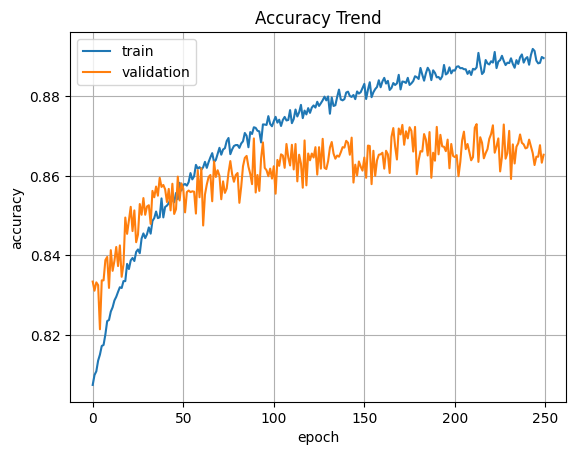

In [22]:
import matplotlib.pyplot as plt

plt.plot(c_history.history['accuracy'])
plt.plot(c_history.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.grid()
plt.show()

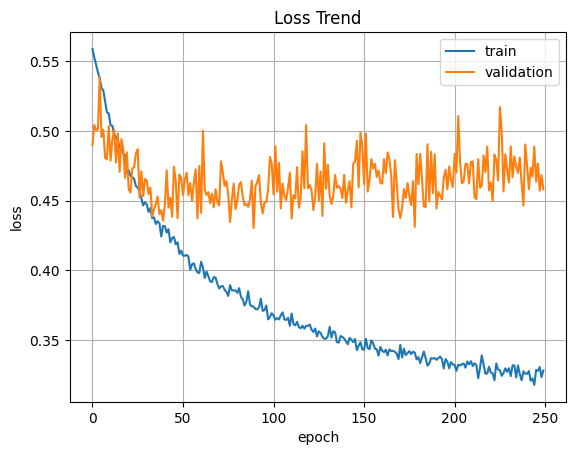

In [23]:
plt.plot(c_history.history['loss'])
plt.plot(c_history.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.grid()
plt.show()

cifal10 결과

입력 크기 32*32*3(컬러이미지)

1. 
특징 추출 : conv2d+relu 2개 + maxpooling
정규화 : dropout0.25, 0.5
분류기 : dense128, 10, softmax
손실 함수 : sparse_categorical_crossentropy
옵티마이저 : Adam
학습 설정 : batch_size=128, epochs=30
콜백 : earlystopping(monitor=val_loss, patience=3, restore_best_weights=True)
학습수 : 13/30

accuracy: 0.7355 - loss: 0.7317 - val_accuracy: 0.7052 - val_loss: 0.8550
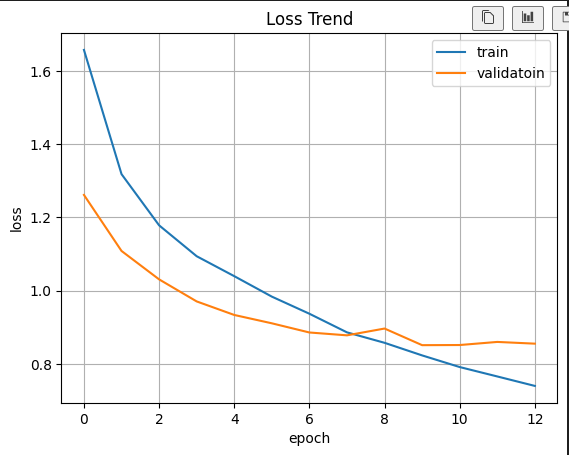


2. 
특징 추출 : Conv2D + ReLU × 2 → MaxPooling2D × 4블록 구성
            (Conv2D(32, 64, 128, 256) + padding='same')
정규화 : Dropout(0.25) 각 Conv 블록 뒤 / Dropout(0.5) Fully Connected 앞
분류기 : Flatten → Dense(128, ReLU) → Dropout(0.5) → Dense(10, Softmax)
손실 함수 : sparse_categorical_crossentropy
옵티마이저 : Adam
학습 설정  : batch_size=256, epochs=250
콜백 : EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
학습수 : 30/250

 accuracy: 0.8139 - loss: 0.5457 - val_accuracy: 0.8259 - val_loss: 0.5097

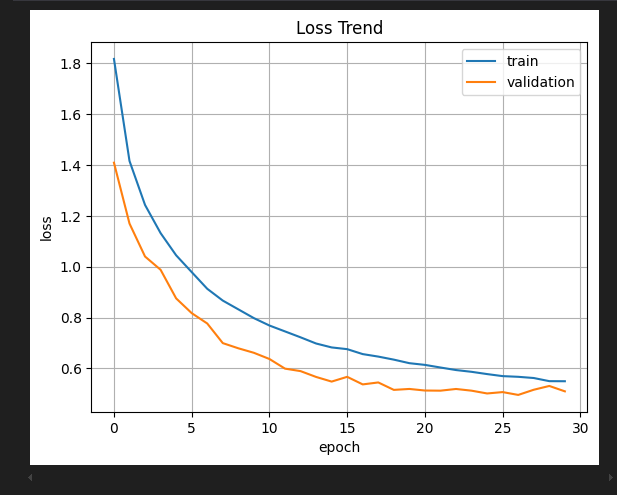

변경된 내용 요약
────────────────────────────────────────
- 데이터 증강
- Conv 블록 수     : 2개 → 4개
- Conv 채널        : 32→64 → 128→256 순으로 확장
- padding          : 기본값 → 'same'으로 명시
- 정규화 위치      : 일부 Conv 블록 뒤 → 모든 블록 뒤에 Dropout(0.25)
- 배치 크기        : 128 → 256
- 최대 에폭 수     : 30 → 250


2 번 모델에서 얼리스탑 제외

accuracy: 0.8915 - loss: 0.3203 - val_accuracy: 0.8653 - val_loss: 0.4580

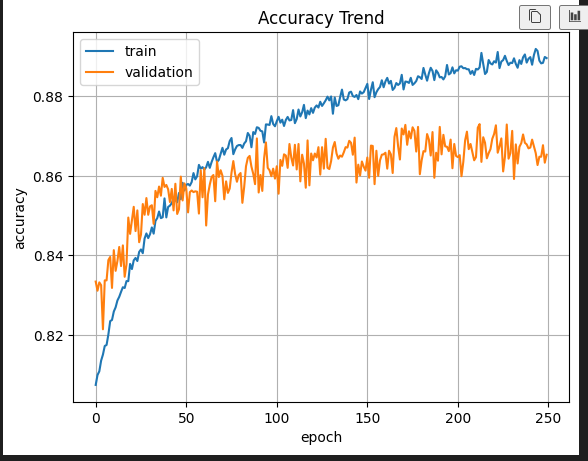

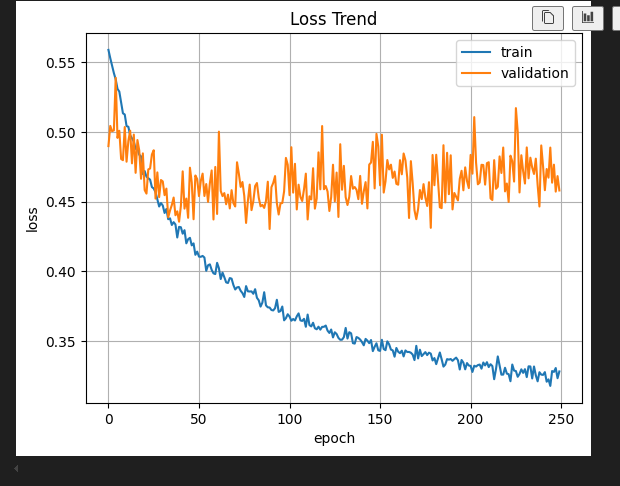

과적합 발생

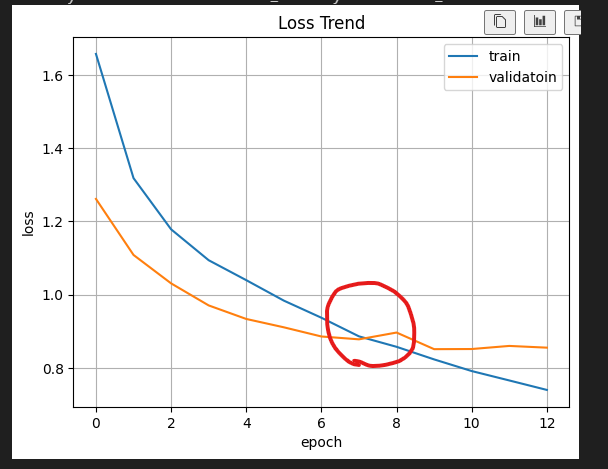

1번 모델의 loss trend 그래프 손실 교차점 발생
손실 교차점 : 과적합 초기 신호

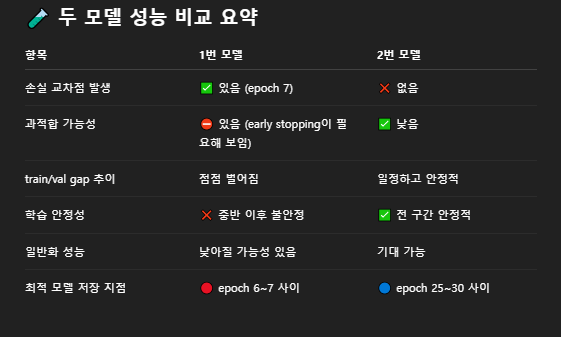

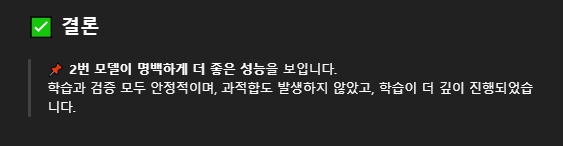